# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

##  Load The Data

### Ski data

In [2]:
ski_data = pd.read_csv('../data/ski_data_cleaned.csv')

In [3]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [4]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


###  State-wide summary data

In [5]:
state_summary = pd.read_csv('../data/state_summary.csv')

In [6]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        35 non-null     object 
 1   resorts_per_state            35 non-null     int64  
 2   state_total_skiable_area_ac  35 non-null     float64
 3   state_total_days_open        35 non-null     float64
 4   state_total_terrain_parks    35 non-null     float64
 5   state_total_nightskiing_ac   35 non-null     float64
 6   state_population             35 non-null     int64  
 7   state_area_sq_miles          35 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ KB


In [7]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,68682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


## Explore The Data

### Top States By Order Of Each Of The Summary Statistics

In [8]:
state_summary_newind = state_summary.set_index('state')

#### Total state area

In [9]:
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

#### Total state population

In [10]:
state_summary_newind.state_population.sort_values(ascending=False).head()

state
California      39512223
New York        19453561
Pennsylvania    12801989
Illinois        12671821
Ohio            11689100
Name: state_population, dtype: int64

California dominates the state population figures despite coming in second behind Alaska in size (by a long way). The resort's state of Montana was in the top five for size, but doesn't figure in the most populous states. Thus Montana is less densely populated.

#### Resorts per state

In [11]:
state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

state
New York        33
Michigan        28
Colorado        22
California      21
Pennsylvania    19
Name: resorts_per_state, dtype: int64

New York comes top in the number of resorts in our market. Is this because of its proximity to wealthy New Yorkers wanting a convenient skiing trip? Or is it simply that its northerly location means there are plenty of good locations for resorts in that state?

####  Total skiable area

In [12]:
state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).head()

state
Colorado      68682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Name: state_total_skiable_area_ac, dtype: float64

New York state may have the most resorts, but they don't account for the most skiing area. In fact, New York doesn't even make it into the top five of skiable area. Good old Montana makes it into the top five, though. You may start to think that New York has more, smaller resorts, whereas Montana has fewer, larger resorts. Colorado seems to have a name for skiing; it's in the top five for resorts and in top place for total skiable area.

#### Total night skiing area

In [13]:
state_summary_newind.state_total_nightskiing_ac.sort_values(ascending=False).head()

state
New York        2836.0
Washington      1997.0
Michigan        1946.0
Pennsylvania    1528.0
Oregon          1127.0
Name: state_total_nightskiing_ac, dtype: float64

New York dominates the area of skiing available at night. Looking at the top five in general, they are all the more northerly states. Is night skiing in and of itself an appeal to customers, or is a consequence of simply trying to extend the skiing day where days are shorter? Is New York's domination here because it's trying to maximize its appeal to visitors who'd travel a shorter distance for a shorter visit?

#### Total days open

In [14]:
state_summary_newind.state_total_days_open.sort_values(ascending=False).head()

state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Name: state_total_days_open, dtype: float64

The total days open seem to bear some resemblance to the number of resorts. This is plausible. The season will only be so long, and so the more resorts open through the skiing season, the more total days open we'll see. New Hampshire makes a good effort at making it into the top five, for a small state that didn't make it into the top five of resorts per state. Does its location mean resorts there have a longer season and so stay open longer, despite there being fewer of them?

###  Resort density

There are big states which are not necessarily the most populous. There are states that host many resorts, but other states host a larger total skiing area. The states with the most total days skiing per season are not necessarily those with the most resorts. And New York State boasts an especially large night skiing area. New York had the most resorts but wasn't in the top five largest states, so the reason for it having the most resorts can't be simply having lots of space for them. New York has the second largest population behind California. Perhaps many resorts have sprung up in New York because of the population size? Does this mean there is a high competition between resorts in New York State, fighting for customers and thus keeping prices down? We're not concerned, per se, with the absolute size or population of a state, but we could be interested in the ratio of resorts serving a given population or a given area.

In [15]:
# The 100_000 scaling is simply based on eyeballing the magnitudes of the data
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,68682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


With the removal of the two columns that only spoke to state-specific data, we now have a Dataframe that speaks to the skiing competitive landscape of each state. It has the number of resorts per state, total skiable area, and days of skiing.

How do the distributions of these two new features look?

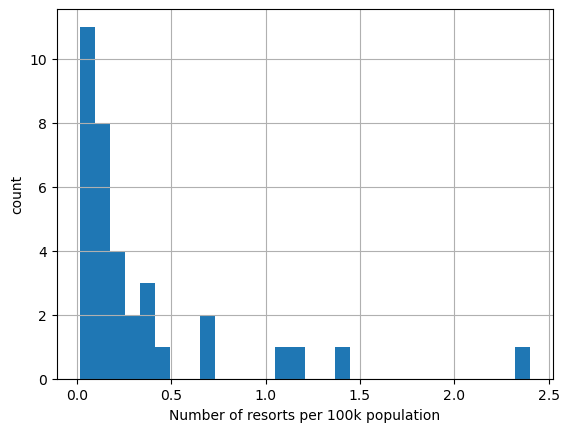

In [16]:
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

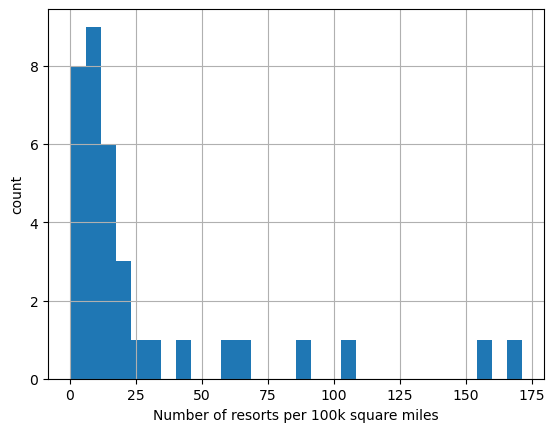

In [17]:
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('count');

So they have quite some long tails on them, but there's definitely some structure there.

#### Top states by resort density


In [18]:
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [19]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

Vermont seems particularly high in terms of resorts per capita, and both New Hampshire and Vermont top the chart for resorts per area. New York doesn't appear in either!

###  Visualizing High Dimensional Data with PCA

####  Scale the data

In [20]:
#Code task 1#
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = state_summary.set_index('state')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
Colorado,22,68682.0,3258.0,74.0,428.0,0.382028,21.134744
Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [21]:
state_summary_scale = scale(state_summary_scale)

In [23]:
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.354356,-0.689059,-0.816118,0.069410,0.139593,-0.689999
1,-0.933558,-0.408182,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
2,1.472706,1.457796,2.190933,2.615141,0.080201,-0.592085,-0.387368
3,1.599351,4.729745,2.816757,2.303209,-0.164893,0.082069,-0.184291
4,-0.553622,-0.501515,-0.679431,-0.548747,-0.430027,-0.413557,1.504408


##### Verifying the scaling

In [24]:
state_summary_scaled_df.mean()

resorts_per_state             -7.295751e-17
state_total_skiable_area_ac    1.794200e-17
state_total_days_open          7.692260e-17
state_total_terrain_parks      4.599495e-17
state_total_nightskiing_ac     7.612958e-17
resorts_per_100kcapita         5.075305e-17
resorts_per_100ksq_mile        5.075305e-17
dtype: float64

This is pretty much zero!

Perform a similar check for the standard deviation

In [25]:
state_summary_scaled_df.std()

resorts_per_state              1.014599
state_total_skiable_area_ac    1.014599
state_total_days_open          1.014599
state_total_terrain_parks      1.014599
state_total_nightskiing_ac     1.014599
resorts_per_100kcapita         1.014599
resorts_per_100ksq_mile        1.014599
dtype: float64

Well, this is a little embarrassing. The numbers should be closer to 1 than this!

In [26]:
#Repeat the previous call to `std()` but pass in ddof=0 
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

#### Calculate the PCA transformation

Fit the PCA transformation using the scaled data.

In [27]:
state_pca = PCA().fit(state_summary_scale)

Plot the cumulative variance ratio with number of components.

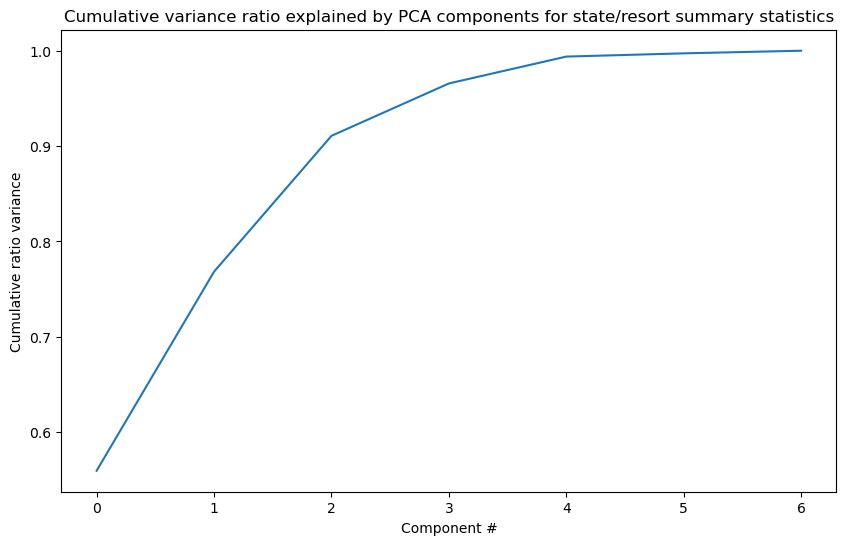

In [28]:
#create a line plot to visualize the cumulative explained variance ratio with number of components

plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

The first two components seem to account for over 75% of the variance, and the first four for over 95%.

Apply the transformation to the data to obtain the derived features.

In [29]:
state_pca_x = state_pca.transform(state_summary_scale)

In [30]:
state_pca_x.shape

(35, 7)

Plot the first two derived features (the first two principle components) and label each point with the name of the state.

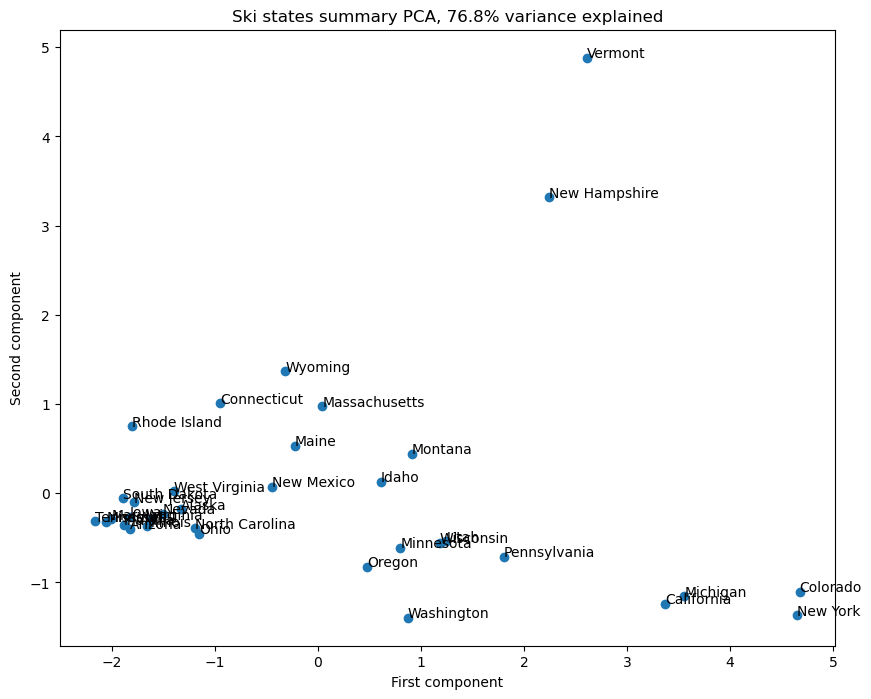

In [31]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

#### Average ticket price by state

Here, all point markers for the states are the same size and colour. You've visualized relationships between the states based on features such as the total skiable terrain area, but your ultimate interest lies in ticket prices. You know ticket prices for resorts in each state, so it might be interesting to see if there's any pattern there.

In [32]:
#Calculate the average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby(by='state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

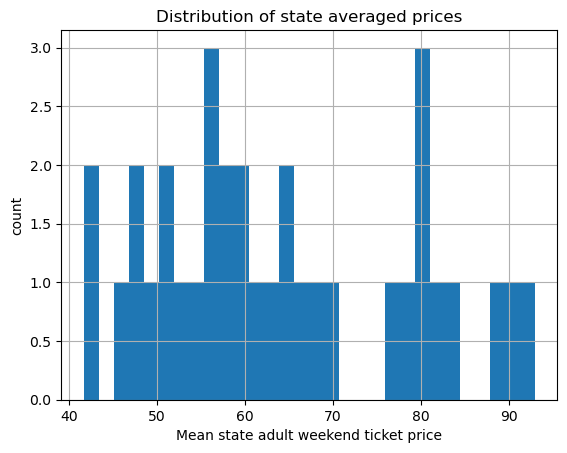

In [33]:
state_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

#### Adding average ticket price to scatter plot

At this point you have several objects floating around. You have just calculated average ticket price by state from our ski resort data, but you've been looking at principle components generated from other state summary data. We extracted indexes and column names from a dataframe and the first two principle components from an array. It's becoming a bit hard to keep track of them all. You'll create a new DataFrame to do this.

In [34]:

#Create a dataframe containing the values of the first two PCA components

pca_df = pd.DataFrame({'PC1': state_pca_x[:, 0], 'PC2': state_pca_x[:, 1]}, index=state_summary_index)
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.328983,-0.179403
Arizona,-1.823177,-0.395812
California,3.372096,-1.236123
Colorado,4.676187,-1.105520
Connecticut,-0.954130,1.010874


In [35]:
# our average state prices also have state as an index
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [36]:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


In [37]:
pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.328983,-0.179403,57.333333
Arizona,-1.823177,-0.395812,83.500000
California,3.372096,-1.236123,81.416667
Colorado,4.676187,-1.105520,90.714286
Connecticut,-0.954130,1.010874,56.800000


We saw some range in average ticket price histogram above, but it may be hard to pick out differences if you're thinking of using the value for point size. lets add another column where you seperate these prices into quartiles; that might show something.

In [38]:
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1)
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.328983,-0.179403,57.333333,"(53.1, 60.4]"
Arizona,-1.823177,-0.395812,83.500000,"(78.4, 93.0]"
California,3.372096,-1.236123,81.416667,"(78.4, 93.0]"
Colorado,4.676187,-1.105520,90.714286,"(78.4, 93.0]"
Connecticut,-0.954130,1.010874,56.800000,"(53.1, 60.4]"


In [39]:
pca_df.dtypes

PC1              float64
PC2              float64
AdultWeekend     float64
Quartile        category
dtype: object

In [40]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Rhode Island,-1.811375,0.749156,NaN,NaN


In [41]:
pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)
pca_df.loc['Rhode Island']

PC1             -1.811375
PC2              0.749156
AdultWeekend    64.124388
Quartile               NA
Name: Rhode Island, dtype: object

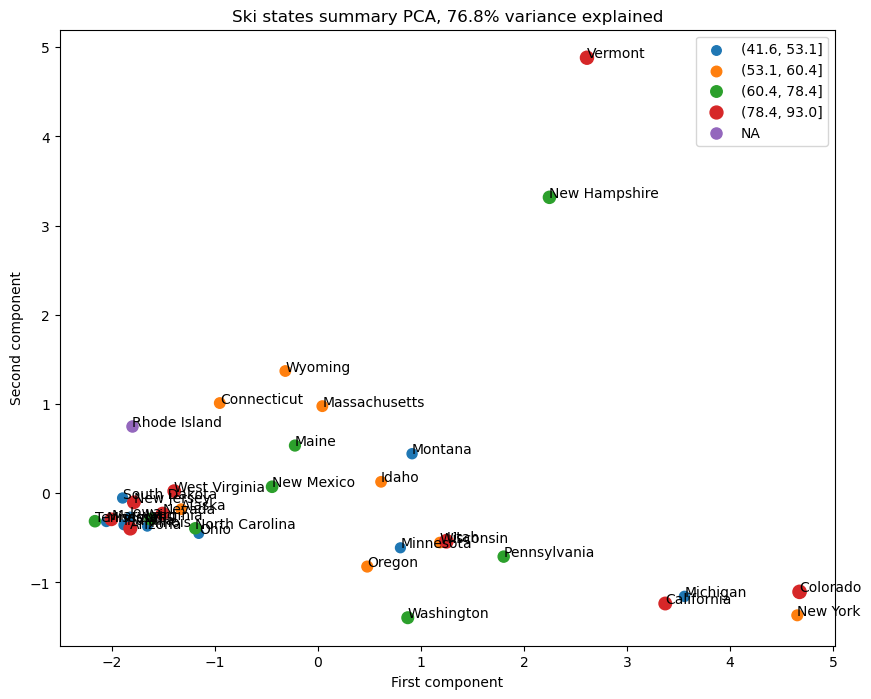

In [42]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.AdultWeekend
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

Now, we see the same distribution of states as before, but with additional information about the average price. There isn't an obvious pattern. The red points representing the upper quartile of price can be seen to the left, the right, and up top. There's also a spread of the other quartiles as well. In this representation of the ski summaries for each state, which accounts for some 77% of the variance, you simply do not see a pattern with price.

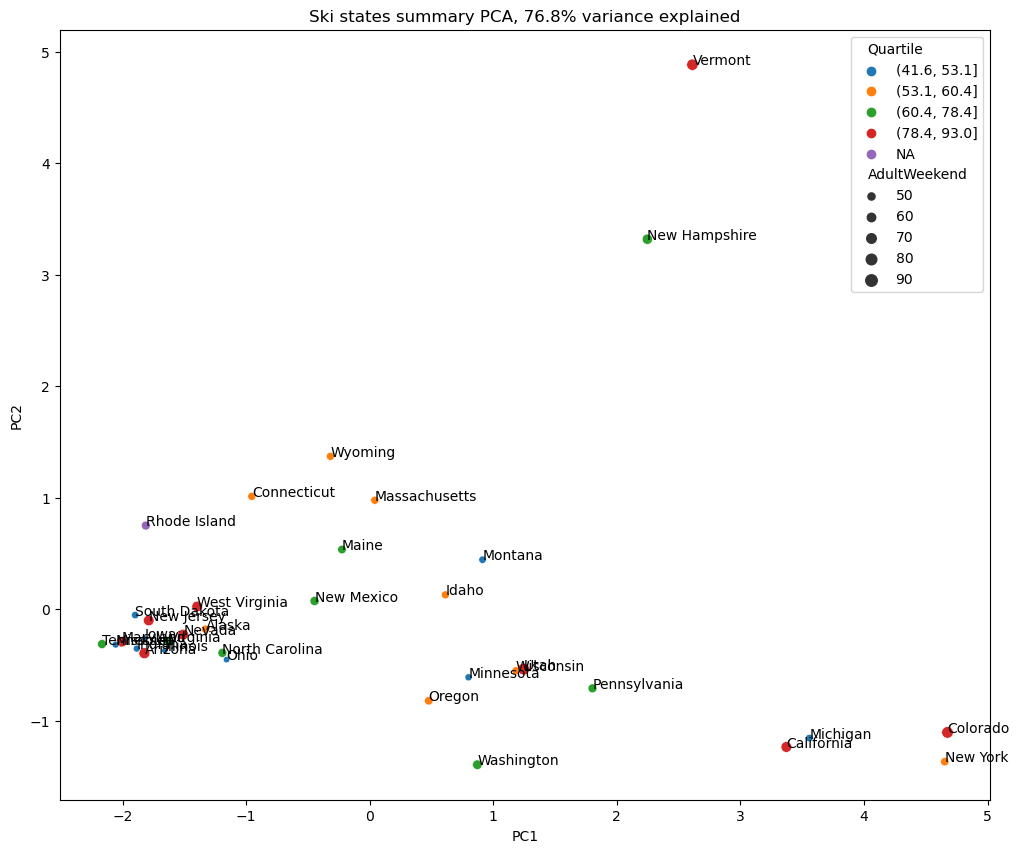

In [43]:
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x='PC1', y='PC2', size='AdultWeekend', hue='Quartile', 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

In the first two components, there is a spread of states across the first component. It looks like Vermont and New Hampshire might be off on their own a little in the second dimension, although they're really no more extreme than New York and Colorado are in the first dimension.

In [44]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.487980,0.306989,0.492918,0.491122,0.333328,0.184745,0.195514
1,-0.083478,-0.153921,-0.048543,-0.043780,-0.342000,0.665016,0.637069
2,-0.177190,0.726514,0.127770,0.016729,-0.538762,0.182903,-0.316953
3,0.066653,-0.163936,-0.092896,-0.111295,0.320874,0.696165,-0.600050
4,-0.199711,0.547323,-0.247802,-0.422766,0.567769,0.051840,0.308816
5,-0.811077,-0.080072,0.183553,0.493476,0.236619,0.050330,-0.003239
6,-0.146075,-0.146269,0.796633,-0.567421,0.018832,-0.017415,-0.004485


It looks like `resorts_per_100kcapita` and `resorts_per_100ksq_mile` might count for quite a lot, in a positive sense.

In [45]:
state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area_ac,3427.0,7239.0
state_total_days_open,1847.0,1777.0
state_total_terrain_parks,43.0,50.0
state_total_nightskiing_ac,376.0,50.0
resorts_per_100kcapita,1.176721,2.403889
resorts_per_100ksq_mile,171.141299,155.990017


In [46]:
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
resorts_per_state,0.839478,0.712833
state_total_skiable_area_ac,-0.266535,0.025332
state_total_days_open,1.118608,1.034363
state_total_terrain_parks,0.921793,1.233725
state_total_nightskiing_ac,-0.245050,-0.747570
resorts_per_100kcapita,1.711066,4.226572
resorts_per_100ksq_mile,3.483281,3.112841


So, yes, both states have particularly large values of `resorts_per_100ksq_mile` in absolute terms, and these put them more than 3 standard deviations from the mean. Vermont also has a notably large value for `resorts_per_100kcapita`. New York, then, does not seem to be a stand-out for density of ski resorts either in terms of state size or population count.

### Ski Resort Numeric Data

In [47]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


####  Feature engineering

In [48]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,68682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [49]:
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [50]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

####  Feature correlation heatmap

A great way to gain a high level view of relationships amongst the features.

/var/folders/lw/r6bk51ln09vdlk9nc13qh7280000gn/T/ipykernel_32851/2533151240.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ski_data.corr());


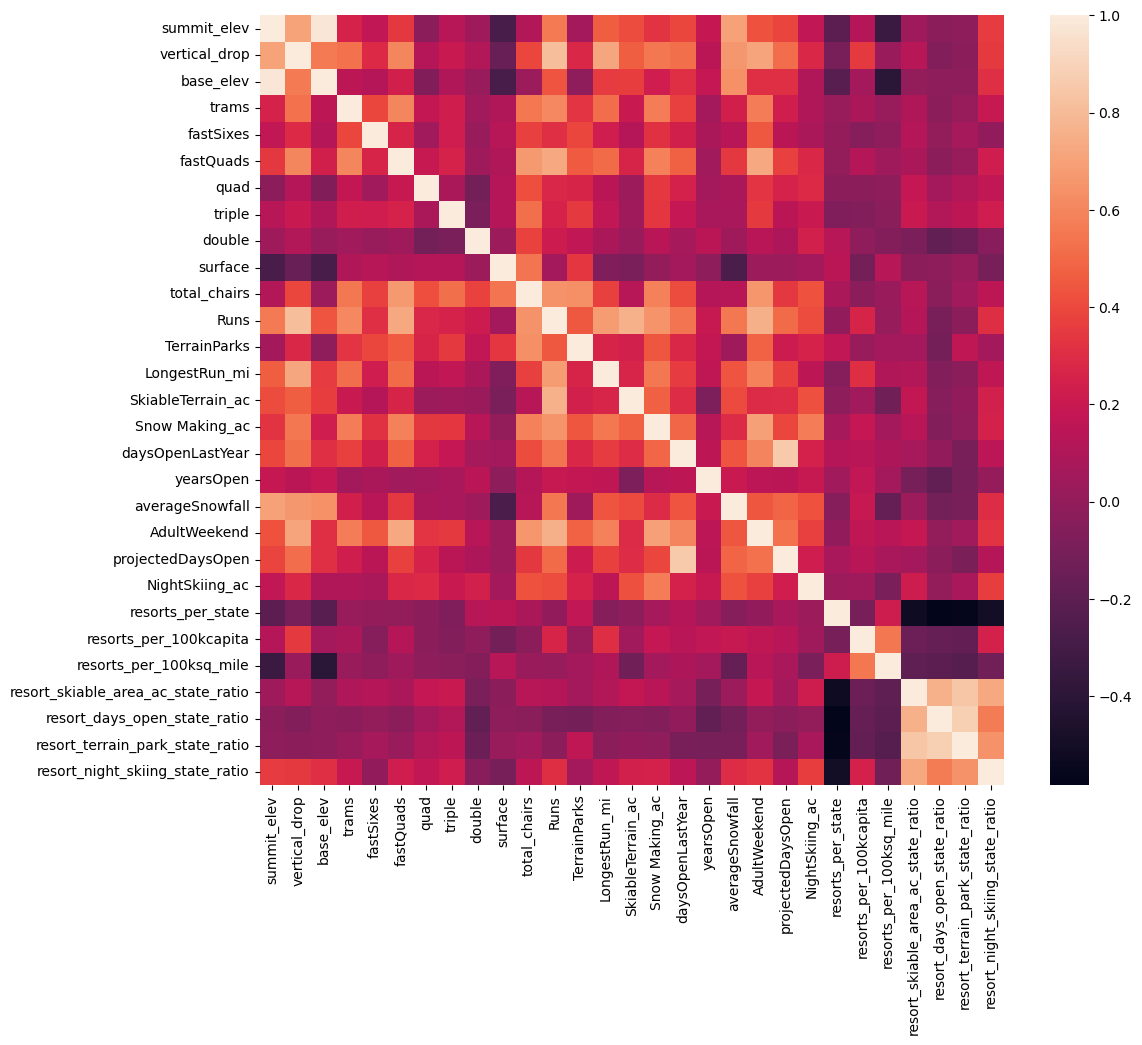

In [51]:

plt.subplots(figsize=(12,10))
sns.heatmap(ski_data.corr());

In [52]:
ski_data.corr()['AdultWeekend'].sort_values()

/var/folders/lw/r6bk51ln09vdlk9nc13qh7280000gn/T/ipykernel_32851/673034354.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ski_data.corr()['AdultWeekend'].sort_values()


resorts_per_state                    -0.005958
resort_days_open_state_ratio         -0.001188
surface                               0.029569
resort_terrain_park_state_ratio       0.051987
double                                0.135899
resorts_per_100ksq_mile               0.136121
yearsOpen                             0.146777
resorts_per_100kcapita                0.159318
resort_skiable_area_ac_state_ratio    0.185808
SkiableTerrain_ac                     0.292820
base_elev                             0.311790
resort_night_skiing_state_ratio       0.323540
quad                                  0.328846
triple                                0.346987
NightSkiing_ac                        0.374366
summit_elev                           0.430049
averageSnowfall                       0.437216
fastSixes                             0.447595
TerrainParks                          0.474914
projectedDaysOpen                     0.529650
trams                                 0.569015
LongestRun_mi

There is a lot to take away from this. First, summit and base elevation are quite highly correlated. This isn't a surprise. We can also see that we've introduced a lot of multicollinearity with the new ratio features; they are negatively correlated with the number of resorts in each state. This latter observation makes sense! If you increase the number of resorts in a state, the share of all the other state features will drop for each. An interesting observation in this region of the heatmap is that there is some positive correlation between the ratio of night skiing area with the number of resorts per capita. In other words, it seems that when resorts are more densely located with population, more night skiing is provided.

Turning our attention to our target feature, `AdultWeekend` ticket price, you see quite a few reasonable correlations. `fastQuads` stands out, along with `Runs` and `Snow Making_ac`. The last one is interesting. Visitors would seem to value more guaranteed snow, which would cost in terms of snow making equipment, which would drive prices and costs up. Of the new features, `resort_night_skiing_state_ratio` seems the most correlated with ticket price. If this is true, then perhaps seizing a greater share of night skiing capacity is positive for the price a resort can charge.

As well as `Runs`, `total_chairs` is quite well correlated with ticket price. This is plausible; the more runs you have, the more chairs you'd need to ferry people to them! Interestingly, they may count for more than the total skiable terrain area. For sure, the total skiable terrain area is not as useful as the area with snow making. People seem to put more value in guaranteed snow cover rather than more variable terrain area.

The vertical drop seems to be a selling point that raises ticket prices as well.

#### Scatterplots of numeric features against ticket price

In [53]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [54]:

features = [col for col in ski_data.columns if col not in ['Name','Region','state','AdultWeekend']]

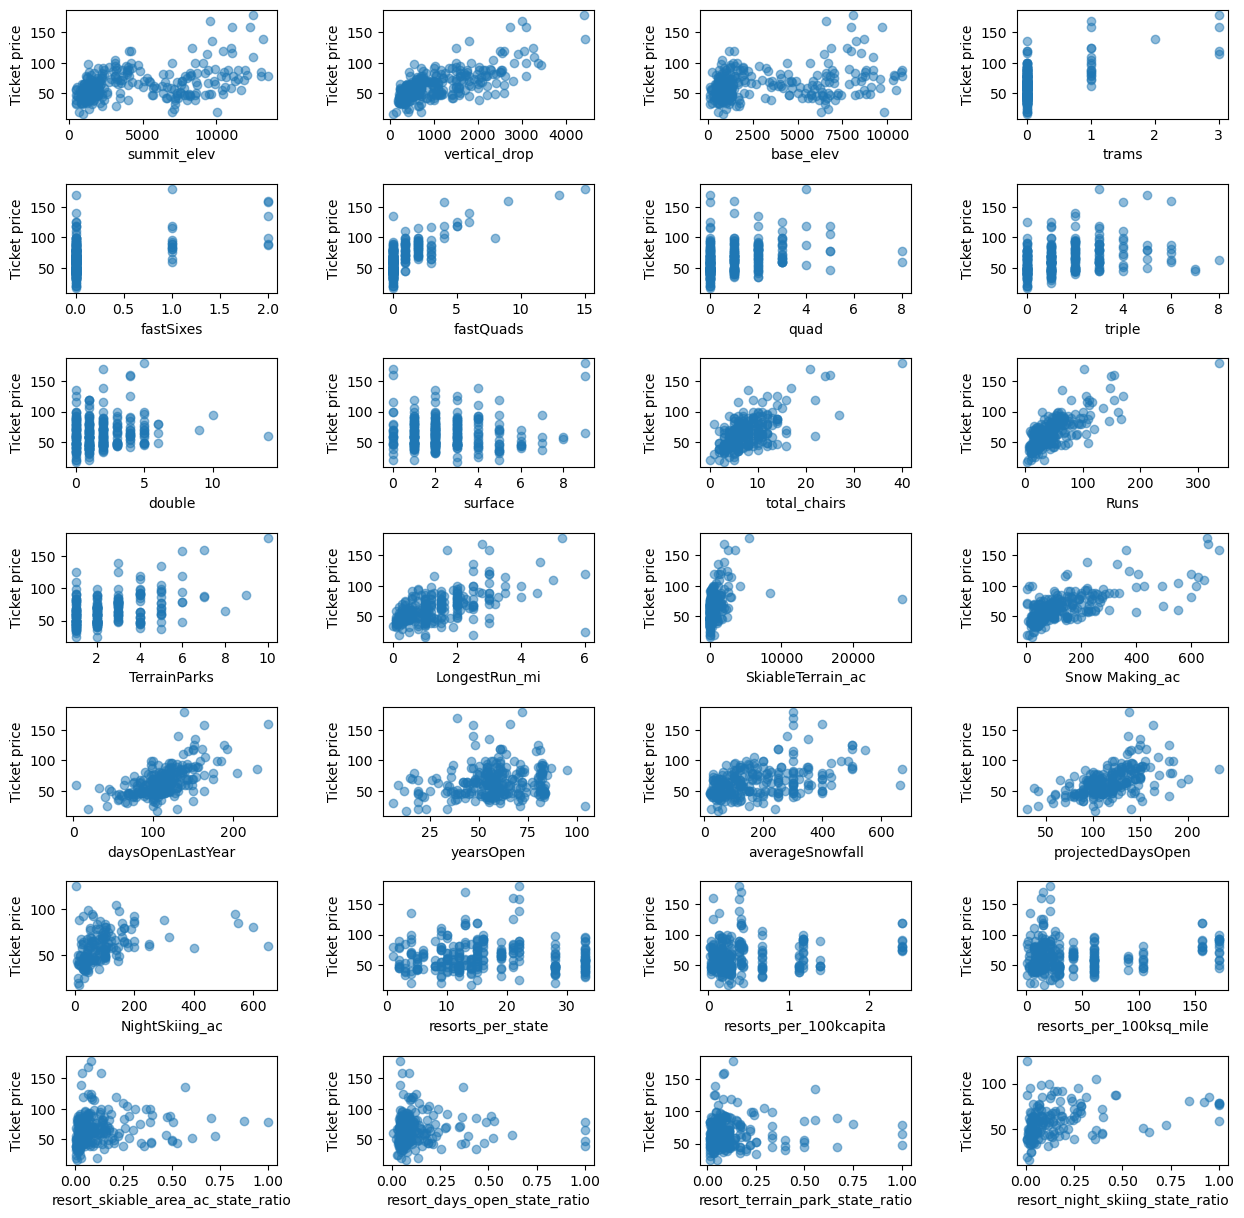

In [55]:
scatterplots(features, ncol=4, figsize=(15, 15))

In the scatterplots you see what some of the high correlations were clearly picking up on. There's a strong positive correlation with `vertical_drop`. `fastQuads` seems very useful. `Runs` and `total_chairs` appear quite similar and also useful. `resorts_per_100kcapita` shows something interesting that you don't see from just a headline correlation figure. When the value is low, there is quite a variability in ticket price, although it's capable of going quite high. Ticket price may drop a little before then climbing upwards as the number of resorts per capita increases. Ticket price could climb with the number of resorts serving a population because it indicates a popular area for skiing with plenty of demand. The lower ticket price when fewer resorts serve a population may similarly be because it's a less popular state for skiing. The high price for some resorts when resorts are rare (relative to the population size) may indicate areas where a small number of resorts can benefit from a monopoly effect. It's not a clear picture, although we have some interesting signs.

In [56]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

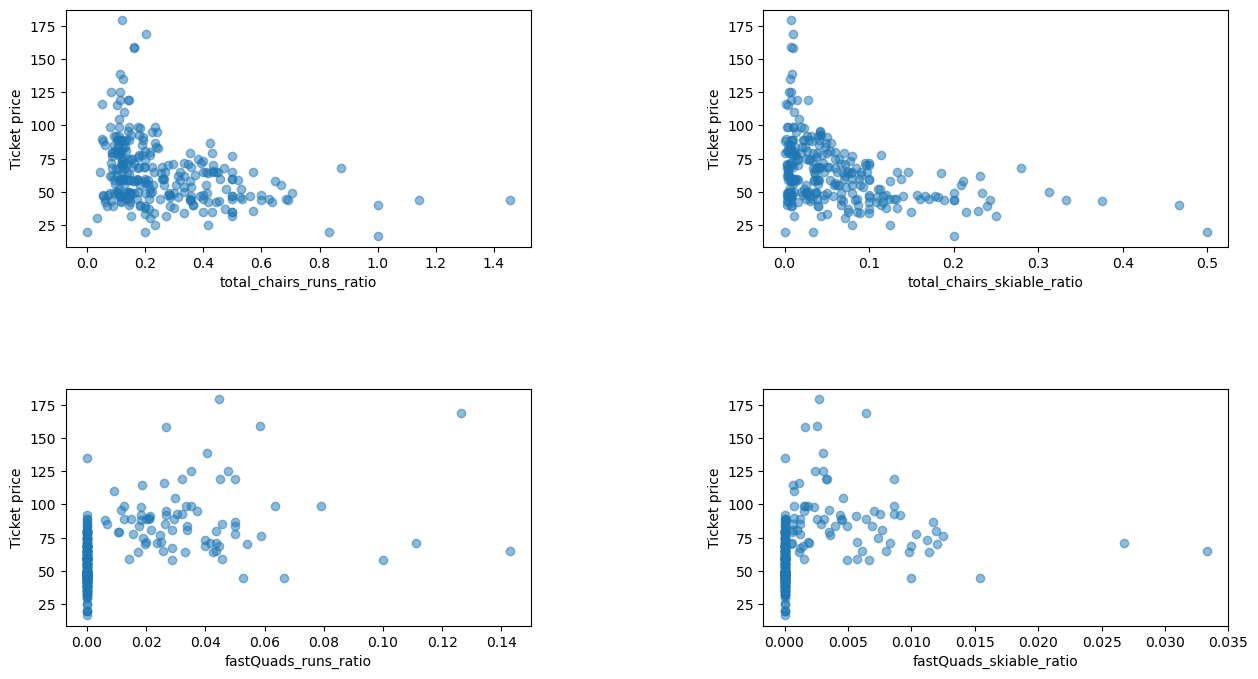

In [57]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

At first these relationships are quite counterintuitive. It seems that the more chairs a resort has to move people around, relative to the number of runs, ticket price rapidly plummets and stays low. What we may be seeing here is an exclusive vs. mass market resort effect; if you don't have so many chairs, you can charge more for your tickets, although with fewer chairs you're inevitably going to be able to serve fewer visitors. Your price per visitor is high but your number of visitors may be low. Something very useful that's missing from the data is the number of visitors per year.

It also appears that having no fast quads may limit the ticket price, but if your resort covers a wide area then getting a small number of fast quads may be beneficial to ticket price.

##  Summary

In this notebook, the relationship between different features and our target were explored more thouroughly through vizualizations and feature engineering. We also explored how to best represent states in our data using PCA.

According to the state summary PCA, 77.2% of the variance explained by the 7 features in state PCA can be described by two features that 'combine'(linearly transform) those 7. We used a scatterplot to represent the relationship between those 2 features and ticket price. There was no obvious correlation that was found but it is important to note that Vermont and New Hampshire both had relatively high values in price, component 1 and component 2. While New York had low values in all 3. The first component sees great positive representation from features that represent the number and size of resorts in each state while the second component sees great positive representation from features that represent the density of resorts (and so popularity of skiing) in each state. Due to this, I think it makes sense to see a generally positive correlation between those 2 components and ticket price.

Next we transformed some of the features from the original dataset into ratios with their state counterpart and then looked at a heatmap showing the correlations between all the features. We also looked at a scatterplot between Price and all the other numerical columns. With those higher level views we were able to come up with more useful ratio transformations that could help predict price such as chairs/runs and quads/skiable terrain. The scatterplots between these new features and Price showed strong correlations, especially number of chairs per run and number of chairs per skiable area.

We now have a dataset with 277 resorts and 32 numerical features.









In [58]:
ski_data.shape

(277, 36)

In [59]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [60]:
# Save the data 

datapath = '../data'
save_file(ski_data, 'ski_data_step3_features.csv', datapath)

A file already exists with this name.

Writing file.  "../data/ski_data_step3_features.csv"
